# Fuzzy論理の実装

## Overview

Fuzzy(ファジィ)論理の実装. モジュール `src.fuzzy` に `Fuzzy` クラスとして実装しています.

## Usage

### Initialize

ファジィ集合の台集合及び各離散値におけるグレード値を渡すことで初期化できます.  
例えば、

 - 離散値: 年齢 (0~15歳)
 - 判断基準: 幼児かどうか
 - グレード値: 0.3/0, 0.6/1, 1.0/2, 0.5/3, 0.2/4

のようなファジィ集合を定義する場合、以下のように定義します:

In [1]:
from src import Fuzzy

underlying_set = list(range(16))
grades = {0:0.3, 1:0.6, 2:1.0, 3:0.5, 4:0.2}
age_fuzzy = Fuzzy(underlying_set, grades)

print(age_fuzzy.set_repr)

0.3/0,0.6/1,1.0/2,0.5/3,0.2/4


*表現1* 形式でフォーマットされたグレード値文字列をベースとして初期化することも可能です:

In [2]:
age_fuzzy = Fuzzy.parse_from(underlying_set, "0.3/0,0.6/1,1.0/2,0.5/3,0.2/4")
print(age_fuzzy.set_repr)

0.3/0,0.6/1,1.0/2,0.5/3,0.2/4


(上記の通り、プロパティ `Fuzzy.set_repr` により *集合1*形式でフォーマットされたファジィ集合を得ることができます.)

### Operation

`Fuzzy` オブジェクトは以下の演算が可能です:

 - **積**: 演算子をオーバーロードしています. `A & B` で各集合の積を取ることができます.
 - **和**: 積と同様です. `A | B` で各集合の和を取ることができます.
 - **補集合**: プロパティにより実装しています. `A.inversed` で補集合を取ることができます.



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


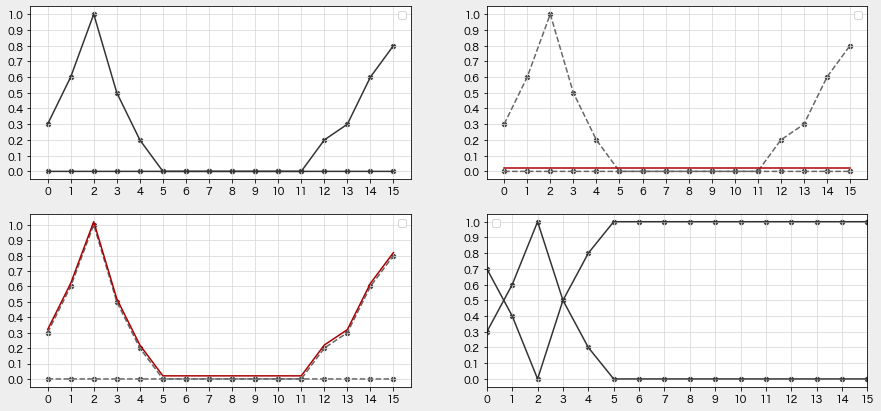

In [3]:
children_fuzzy = Fuzzy.parse_from(underlying_set, "0.3/0,0.6/1,1.0/2,0.5/3,0.2/4")
youths_fuzzy = Fuzzy.parse_from(underlying_set, "0.2/12,0.3/13,0.6/14,0.8/15")

import matplotlib.pyplot as plt
import helper

# 2x2=4枚のグラフ領域を初期化
axes = helper.init_canvas((15,7), (2,2))

# 描画
helper.draw([children_fuzzy, youths_fuzzy], axes[0])
helper.draw([children_fuzzy, youths_fuzzy, children_fuzzy & youths_fuzzy], axes[1], (2,))
helper.draw([children_fuzzy, youths_fuzzy, children_fuzzy | youths_fuzzy], axes[2], (2,))
helper.draw([children_fuzzy, children_fuzzy.inversed], axes[3])

plt.show()